In [40]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch                  #for creating dendrogram
from sklearn.cluster import AgglomerativeClustering    #for creating clustering
from sklearn.preprocessing import MinMaxScaler 
from numpy import set_printoptions
import warnings
warnings.filterwarnings("ignore")

In [33]:
Univ = pd.read_csv("G:/data sceince/Python/Clustering/Hierarchical clustering/Universities.csv")

In [34]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [ ]:
# performing business decisions

In [35]:
Univ.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [ ]:
# checking normaliztion

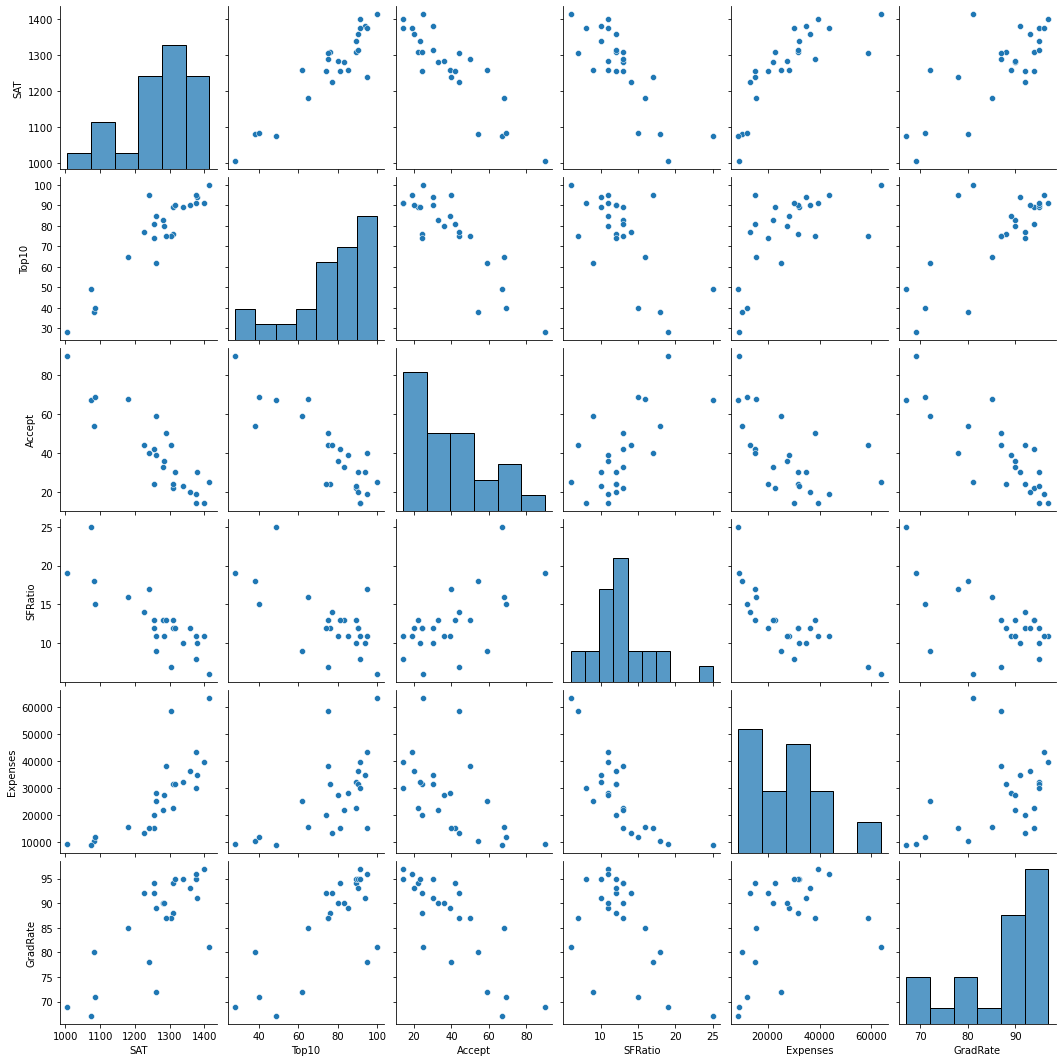

In [44]:
sns.pairplot(Univ)

In [ ]:
# checking for outliers in data

<AxesSubplot:xlabel='SAT'>

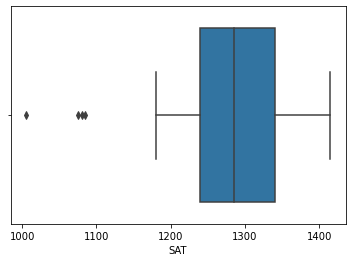

In [46]:
sns.boxplot(Univ['SAT'])

<AxesSubplot:xlabel='Top10'>

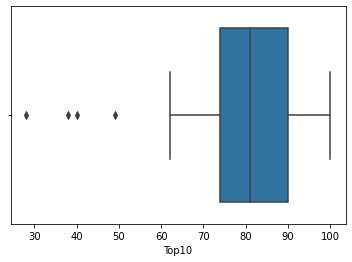

In [47]:
sns.boxplot(Univ['Top10'])

<AxesSubplot:xlabel='Accept'>

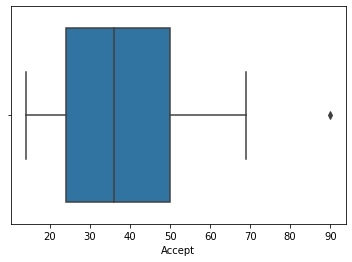

In [48]:
sns.boxplot(Univ['Accept'])

<AxesSubplot:xlabel='SFRatio'>

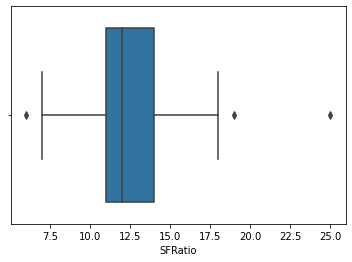

In [49]:
sns.boxplot(Univ['SFRatio'])

<AxesSubplot:xlabel='Expenses'>

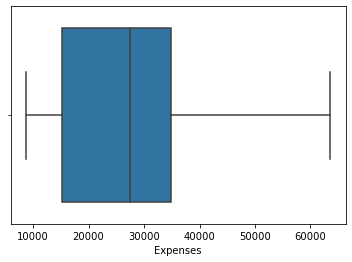

In [50]:
sns.boxplot(Univ['Expenses'])

<AxesSubplot:xlabel='GradRate'>

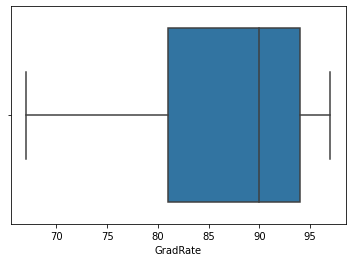

In [51]:
sns.boxplot(Univ['GradRate'])

In [ ]:
# checking for null value

In [52]:
Univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [ ]:
# Normalizing the values using minmax scaler function

In [53]:
array = Univ.values

In [54]:
array

array([['Brown', 1310, 89, 22, 13, 22704, 94],
       ['CalTech', 1415, 100, 25, 6, 63575, 81],
       ['CMU', 1260, 62, 59, 9, 25026, 72],
       ['Columbia', 1310, 76, 24, 12, 31510, 88],
       ['Cornell', 1280, 83, 33, 13, 21864, 90],
       ['Dartmouth', 1340, 89, 23, 10, 32162, 95],
       ['Duke', 1315, 90, 30, 12, 31585, 95],
       ['Georgetown', 1255, 74, 24, 12, 20126, 92],
       ['Harvard', 1400, 91, 14, 11, 39525, 97],
       ['JohnsHopkins', 1305, 75, 44, 7, 58691, 87],
       ['MIT', 1380, 94, 30, 10, 34870, 91],
       ['Northwestern', 1260, 85, 39, 11, 28052, 89],
       ['NotreDame', 1255, 81, 42, 13, 15122, 94],
       ['PennState', 1081, 38, 54, 18, 10185, 80],
       ['Princeton', 1375, 91, 14, 8, 30220, 95],
       ['Purdue', 1005, 28, 90, 19, 9066, 69],
       ['Stanford', 1360, 90, 20, 12, 36450, 93],
       ['TexasA&M', 1075, 49, 67, 25, 8704, 67],
       ['UCBerkeley', 1240, 95, 40, 17, 15140, 78],
       ['UChicago', 1290, 75, 50, 13, 38380, 87],
       ['UM

In [55]:
array = Univ.values

scaler = MinMaxScaler(feature_range = (0,1))
rescaledx = scaler.fit_transform(array[:,1:])

set_printoptions(precision = 2)
print(rescaledx[:,1:])

[[0.85 0.11 0.37 0.26 0.9 ]
 [1.   0.14 0.   1.   0.47]
 [0.47 0.59 0.16 0.3  0.17]
 [0.67 0.13 0.32 0.42 0.7 ]
 [0.76 0.25 0.37 0.24 0.77]
 [0.85 0.12 0.21 0.43 0.93]
 [0.86 0.21 0.32 0.42 0.93]
 [0.64 0.13 0.32 0.21 0.83]
 [0.88 0.   0.26 0.56 1.  ]
 [0.65 0.39 0.05 0.91 0.67]
 [0.92 0.21 0.21 0.48 0.8 ]
 [0.79 0.33 0.26 0.35 0.73]
 [0.74 0.37 0.37 0.12 0.9 ]
 [0.14 0.53 0.63 0.03 0.43]
 [0.88 0.   0.11 0.39 0.93]
 [0.   1.   0.68 0.01 0.07]
 [0.86 0.08 0.32 0.51 0.87]
 [0.29 0.7  1.   0.   0.  ]
 [0.93 0.34 0.58 0.12 0.37]
 [0.65 0.47 0.37 0.54 0.67]
 [0.51 0.71 0.53 0.12 0.6 ]
 [0.72 0.29 0.26 0.34 0.77]
 [0.68 0.39 0.42 0.08 0.83]
 [0.17 0.72 0.47 0.06 0.13]
 [0.93 0.07 0.26 0.63 0.97]]


In [ ]:
# normalizing the values using user defined function

In [56]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [57]:
df_norm = norm_func(Univ.iloc[:,1:])

In [18]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [ ]:
# creating dendrogram using dendrogram function and linkage function

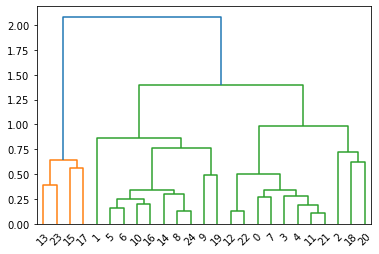

In [58]:
dendrogram = sch.dendrogram(sch.linkage(df_norm,method ='complete'))   # type of linkage method = complete

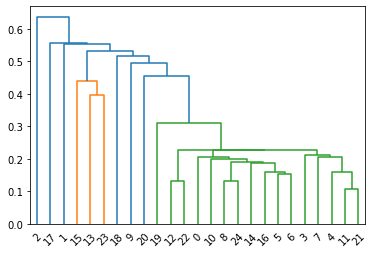

In [59]:
dendrogram = sch.dendrogram(sch.linkage(df_norm,method ='single'))

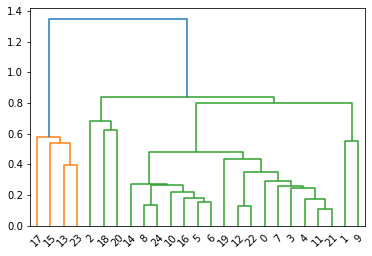

In [60]:
dendrogram = sch.dendrogram(sch.linkage(df_norm,method ='average'))

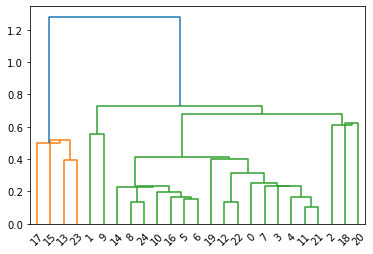

In [61]:
dendrogram = sch.dendrogram(sch.linkage(df_norm,method ='centroid'))

In [ ]:
# creation of cluster using agglomerativeclustering function


In [62]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage='complete')

In [63]:
# predicting clustering on normalized data
y_hc = hc.fit_predict(df_norm)
clusters = pd.DataFrame(y_hc,columns =['Clusters'])  #creating a dataframe to see the created clusters. Column name will be Clusters and below that there will be predicted values that is y_hc

In [64]:
clusters

,Clusters
0,0
1,2
2,0
3,0
4,0
5,2
6,2
7,0
8,2
9,2


In [65]:
# creating cluster labels so that we will understand which university is belonging to which cluster.

Univ['h_clusterid'] = hc.labels_

In [66]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,2
